# 1、加载数据

In [14]:
import pandas as pd

df = pd.read_csv("directory.csv")
print(df)

           Brand  Store Number        Store Name Ownership Type  \
0      Starbucks  47370-257954     Meritxell, 96       Licensed   
1      Starbucks  22331-212325  Ajman Drive Thru       Licensed   
2      Starbucks  47089-256771         Dana Mall       Licensed   
3      Starbucks  22126-218024        Twofour 54       Licensed   
4      Starbucks  17127-178586      Al Ain Tower       Licensed   
...          ...           ...               ...            ...   
25595  Starbucks  21401-212072               Rex       Licensed   
25596  Starbucks  24010-226985          Panorama       Licensed   
25597  Starbucks  47608-253804     Rosebank Mall       Licensed   
25598  Starbucks  47640-253809      Menlyn Maine       Licensed   
25599  Starbucks  47609-253286    Mall of Africa       Licensed   

                                          Street Address  \
0                                      Av. Meritxell, 96   
1                                   1 Street 69, Al Jarf   
2              

# 2、星巴克门店数量Top10国家或地区

[13608  2734  1468  1237   993   901   579   394   326   298]


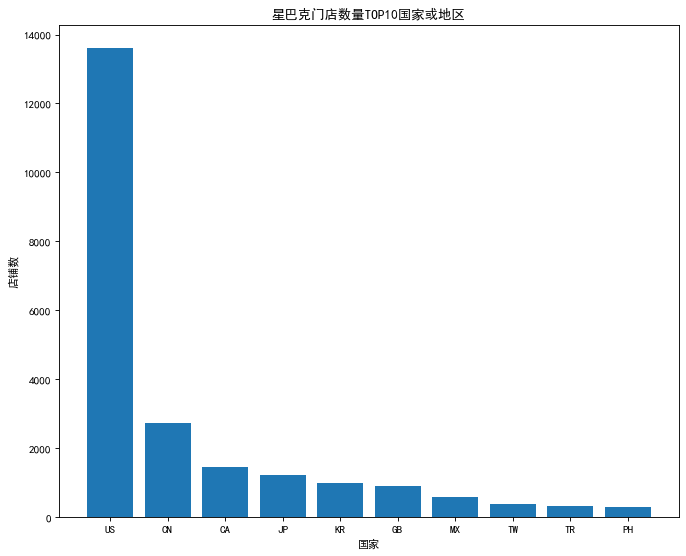

In [15]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 处理数据
data = df.groupby(by="Country").count().sort_values(by="Brand", ascending=False)[:10]["Brand"]
x = data.index
y = data.values
print(y)

# # 画图
plt.figure(figsize=(10,8), dpi=80)
plt.bar(range(len(x)), y, label='门店数量')

plt.xticks(range(len(x)), x)
plt.xlabel("国家")
plt.ylabel("店铺数")
plt.title("星巴克门店数量TOP10国家或地区")
plt.show()

# 3、星巴克门店数量Top10城市

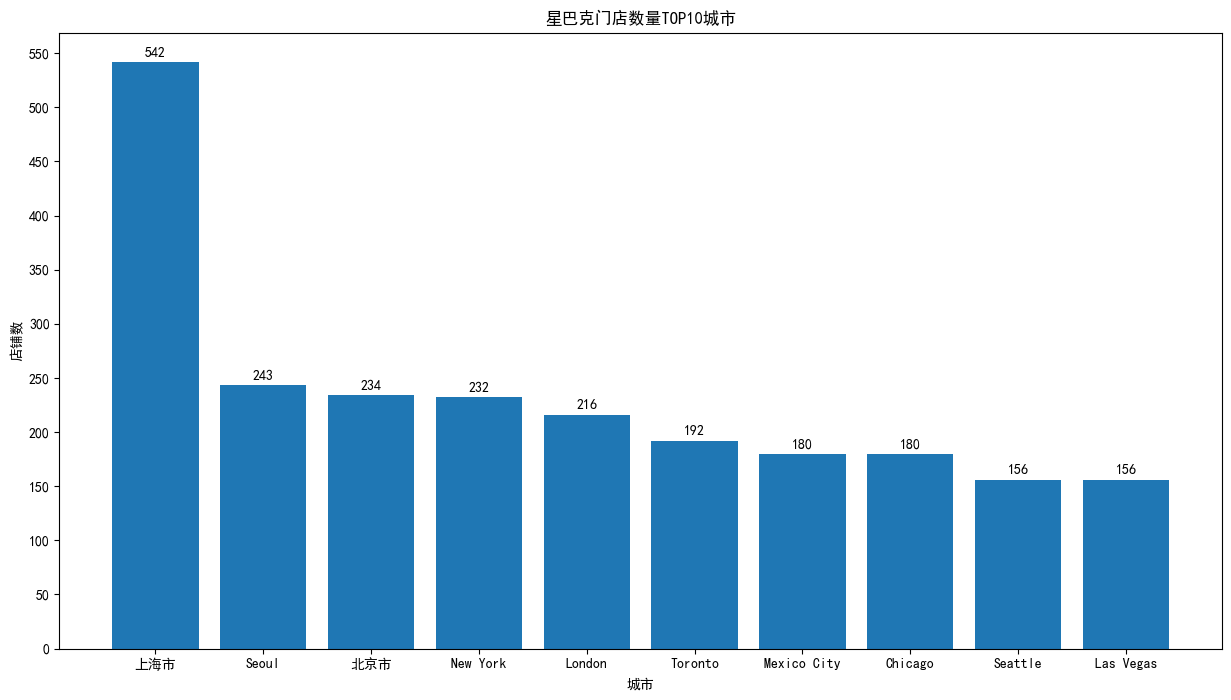

In [16]:
# 处理数据
data = df.groupby(by="City").count().sort_values(by="Brand", ascending=False)[:10]["Brand"]
x_data = data.index
y_data = data.values

# 画图
plt.figure(figsize=(15,8))

plt.bar(range(len(x_data)), y_data)

# 添加条形图数值
for x, y in zip(range(len(y_data)),y_data):
    plt.text(x, y+5, str(y), ha='center')

plt.xticks(range(len(x_data)), x_data)
plt.yticks(range(max(y_data)+50)[::50])
plt.xlabel("城市")
plt.ylabel("店铺数")
plt.title("星巴克门店数量TOP10城市")

plt.show()

# 4、星巴克门店所有权分布

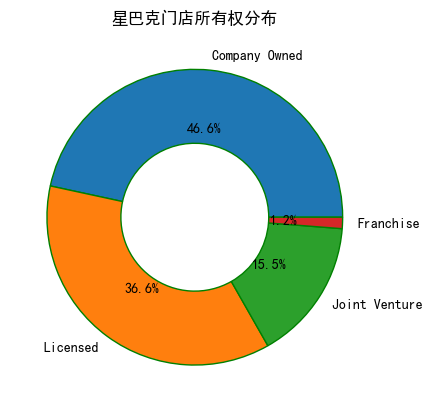

In [17]:
import matplotlib.pyplot as plt

# 数据
data = df['Ownership Type'].value_counts()
labels = list(data.index)
y_data = data.values



# 将横、纵坐标轴标准化处理，保证饼图是一个正圆，否则为椭圆
plt.axes(aspect='equal')

# 绘制环形图
plt.pie(x=y_data,  # 绘图数据
    labels = labels,  # 添加标签
    autopct = '%.1f%%',  # 设置百分比的格式，这里保留一位小数
    wedgeprops = {'width': 0.5, 'edgecolor':'green'}
    )

# 添加图标题
plt.title('星巴克门店所有权分布')

# 保存图形
plt.show()

# 5、全球门店分布

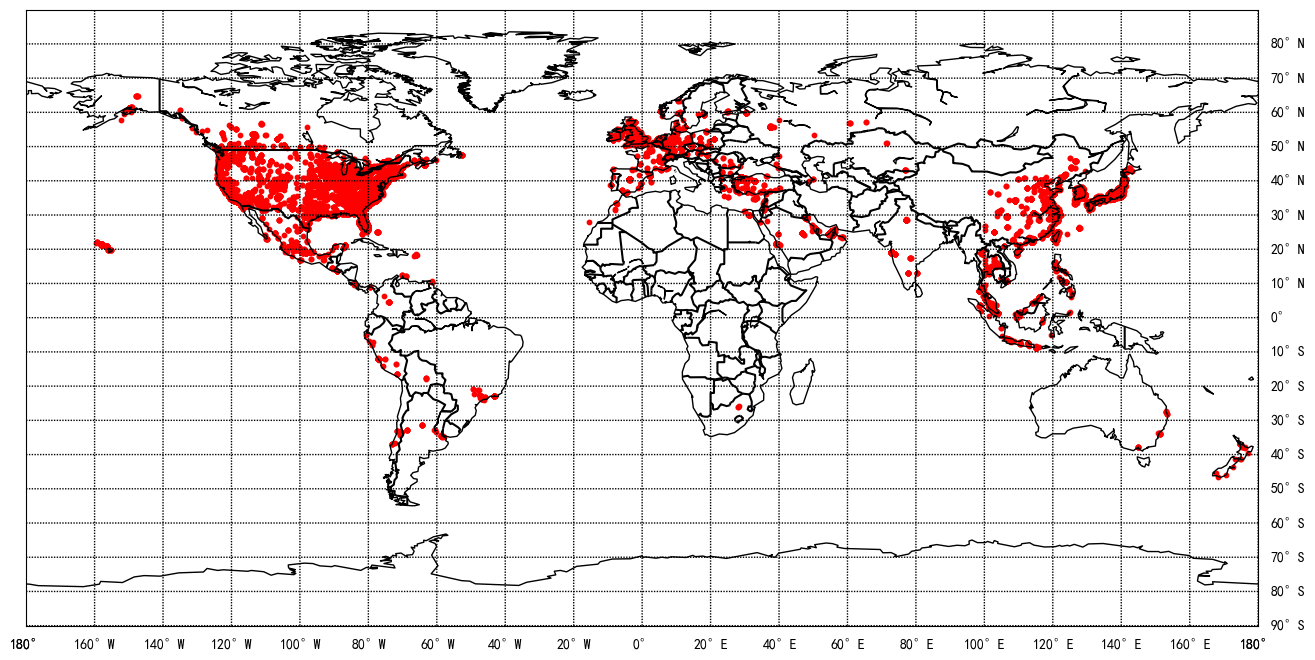

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import mpl_toolkits
from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(16,8))
m = Basemap()
m.drawcoastlines() # 绘制海岸线
m.drawcountries(linewidth=1.5) # 绘制国境线
parallels = np.arange(-90., 90., 10.)    # 这两行画纬度，范围为[-90,90]间隔为10
m.drawparallels(parallels,labels=[False, True, True, False])
meridians = np.arange(-180., 180., 20.)   # 这两行画经度，范围为[-180,180]间隔为10
m.drawmeridians(meridians,labels=[True, False, False, True])

lon = df["Longitude"]
lat = df["Latitude"]

lon, lat = m(lon, lat)    # lon, lat为给定的经纬度，可以使单个的，也可以是列表
m.scatter(lon, lat, s=10,color="red")# 标注出所在的点，s为点的大小，还可以选择点的性状和颜色等属性
plt.show()

# 6、中国区门店分布

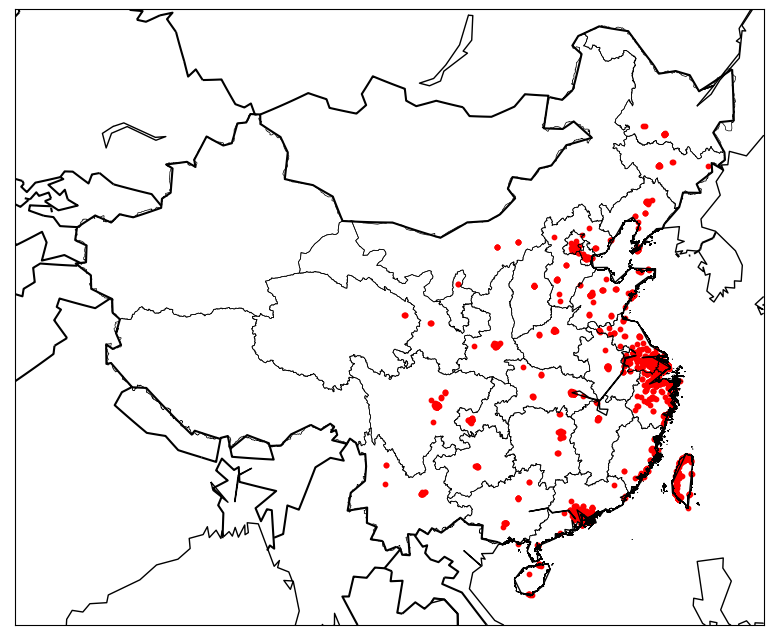

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(16,8))
# 设置中国所在的经纬度
m = Basemap(llcrnrlon=77, llcrnrlat=14, urcrnrlon=140, urcrnrlat=51, projection='lcc', lat_1=33, lat_2=45, lon_0=100)
m.drawcoastlines()
m.drawcountries(linewidth=1.5)

# 31个省、直辖市、自治区
m.readshapefile('gadm36_CHN_shp/gadm36_CHN_1', 'states', drawbounds=True)
# 港澳台的数据，需要额外导入
# 香港
m.readshapefile('gadm36_HKG_shp/gadm36_HKG_0', 'hongkong', drawbounds=True)
# 澳门
m.readshapefile('gadm36_MAC_shp/gadm36_MAC_0', 'macao', drawbounds=True)
# 台湾
m.readshapefile('gadm36_TWN_shp/gadm36_TWN_0', 'taiwan', drawbounds=True)

lon = df.loc[df["Country"] == "CN",["Longitude"]]
lat = df.loc[df["Country"] == "CN",["Latitude"]]
lon1 = df.loc[df["Country"] == "TW",["Longitude"]]
lat1 = df.loc[df["Country"] == "TW",["Latitude"]]
lon = lon["Longitude"].tolist()
lat = lat["Latitude"].tolist()
lon1 = lon1["Longitude"].tolist()
lat1 = lat1["Latitude"].tolist()
lon, lat = m(lon, lat)    # lon, lat为给定的经纬度，可以使单个的，也可以是列表
lon1, lat1 = m(lon1, lat1) 
m.scatter(lon, lat, s=10,color="red")# 标注出所在的点，s为点的大小，还可以选择点的性状和颜色等属性
m.scatter(lon1, lat1, s=10,color="red")

plt.show()